In [2]:
import os

csv_path = "ravdess_features_full_augmented.csv"
print("✅ File exists!" if os.path.exists(csv_path) else "❌ File not found.")

✅ File exists!


✅ Dataset ready!
Train shape: (3456, 30, 6)
Test shape: (864, 30, 6)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 30, 256)        │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 15, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 7, 128)         │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 7, 256)         │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,408 (2.10 MB)

 Trainable params: 549,384 (2.10 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.1997 - loss: 2.3449 - val_accuracy: 0.1944 - val_loss: 2.0075 - learning_rate: 0.0010
Epoch 2/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2413 - loss: 2.0301 - val_accuracy: 0.2546 - val_loss: 1.9729 - learning_rate: 0.0010
Epoch 3/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2734 - loss: 1.9215 - val_accuracy: 0.2442 - val_loss: 1.9486 - learning_rate: 0.0010
Epoch 4/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.2865 - loss: 1.8182 - val_accuracy: 0.2894 - val_loss: 1.8197 - learning_rate: 0.0010
Epoch 5/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.3333 - loss: 1.7391 - val_accuracy: 0.3819 - val_loss: 1.5989 - learning_rate: 0.0010
Epoch 6/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.3411 - loss: 1.6693 - val_accuracy: 0.4109 - val_loss: 1.5932 - learning_rate: 0.0010
Epoch 7/150
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3845 - 

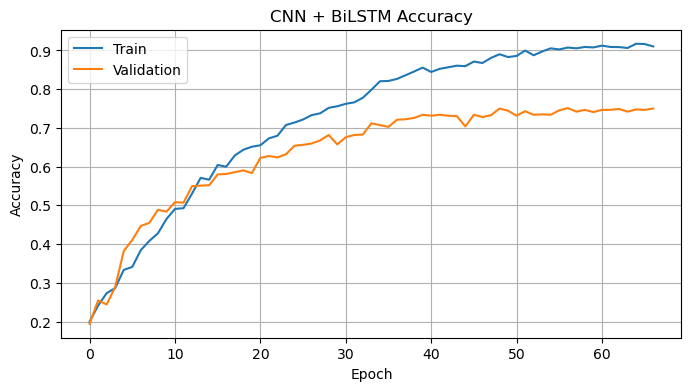


💾 Model saved as cnn_bilstm_emotion.keras


In [3]:
# ===============================================
# 🎧 Train CNN + BiLSTM on RAVDESS Features
# ===============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Bidirectional,
                                     LSTM, Dense, Dropout, BatchNormalization,
                                     SpatialDropout1D)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# --- Load Dataset ---
df = pd.read_csv("ravdess_features_full_augmented.csv")

# --- Map Emotion Labels ---
emotion_map = {
    1:'neutral', 2:'calm', 3:'happy', 4:'sad',
    5:'angry', 6:'fearful', 7:'disgust', 8:'surprised'
}
df['emotion_label'] = df['emotion'].map(emotion_map)

# --- Drop rare classes with <2 samples ---
emotion_counts = df['emotion'].value_counts()
df = df[df['emotion'].isin(emotion_counts[emotion_counts > 1].index)]

# --- Features and Labels ---
X = df.drop(['file_path', 'emotion', 'emotion_label'], axis=1).values
y = df['emotion_label']

# --- Normalize Features ---
scaler = StandardScaler()
X = scaler.fit_transform(X)

# --- Encode Labels ---
lb = LabelEncoder()
y_int = lb.fit_transform(y)
y_encoded = to_categorical(y_int)

# --- Compute Class Weights ---
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_int), y=y_int)
class_weights_dict = dict(enumerate(class_weights))

# --- Train-Test Split (no stratify to avoid errors) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# --- Reshape for CNN + BiLSTM ---
time_steps = 30
n_features = X_train.shape[1] // time_steps
X_train = X_train[:, :time_steps*n_features].reshape(-1, time_steps, n_features)
X_test = X_test[:, :time_steps*n_features].reshape(-1, time_steps, n_features)

print("✅ Dataset ready!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# --- Model Architecture ---
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    SpatialDropout1D(0.2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# --- Train Model ---
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_data=(X_test, y_test),
    class_weight=class_weights_dict,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# --- Evaluate ---
loss, acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {acc*100:.2f}%")

# --- Plot Accuracy ---
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('CNN + BiLSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# --- Save Model ---
model.save("cnn_bilstm_emotion.keras")
print("\n💾 Model saved as cnn_bilstm_emotion.keras")